In [49]:
#### specify path of Julia Code for 2D Models ####
### By default the working directory ./2D_Models ###
path = string( pwd(), "/2D_Models/")

"/home/jakob/Dokumente/Repositories/Modeling_Framework/2D_Models/"

In [102]:
##### include 2D Modelling Framework ####
include(string(path, "./2D_model_library.jl"));


########## OPERATIONAL ##########
##### how to chose the actual velocity? #####

#op_model = "Constant"
#op_model = "Collision_Free_Speed"
#op_model = "Collision_Free_Speed_XU"
#op_model = "RVO"
op_model = "SocialForce"
#op_model = "AV_Model"
#op_model = "AV_IN_Model"
#op_model = "PowerLaw"
#op_model = "IN_Costfunction"
#op_model = "IN_Model"
#op_model = "SocialForce"
#op_model = "SocialForce_Elliptical_A"
#op_model = "SocialForce_Elliptical_B"
#op_model = "SocialForce_CollisionPrediction"
#op_model = "SocialForce_Rotation"
#op_model = "Centrifugal_Force"
#op_model = "Generalized_Centrifugal_Force"


include_op_model(op_model, path)

########## TACTICAL ##########
#### how to chose the preferred velocity? ###

tact_model = "Constant"
#tact_model = "IN_Model"

include_tact_model(tact_model, path)


########## STRATEGIC ##########
### how to chose the desired velocity ###

strat_model = "Constant"
#strat_model = "Towards_Goal"
#strat_model = "Two_Goals"


include_strat_model(strat_model, path)


########## OPTIMIZATION SCHEME ##########
### If optimization of a cost-function is included, how to solve? ###

#optimization_scheme = "Regular_Sampling"
optimization_scheme = "Random_Sampling"

include_optimization_scheme(optimization_scheme, path)


##### which update scheme? #####

update = "Parallel_Update"
#update = "Step_Update"

include_update(update, path)


##### which order? i.e. Acceleration or Velocity based? ####
#order = "first"
order = "second"

include_order(order, path)


##### PERCEPTIONAL MODEL ####
perception_model = "None"
#perception_model = "Only_in_Front"

include_perception_model(perception_model, path)

The following parameters were given in chraibi_GeneralizedCentrifugalforceModel_2010:
[2.0, 1.7, 0.0, 0.0, 0.3, 0.0, 0.0, 0.5, 2.0, 0.5, 0.0, 0.0, 0.0, 0.0]
v_max, v_des, T, T2, l, step_time, τ_A, τ_R, α, β, ζ_h, ζ_v, r, λ


In [103]:
### of the system ###
N = 2
system_size = (100.0, 100.0) #important for periodic boundaries
p = [2.0, 1.7, 0.0, 0.0, 0.3, 0.0, 0.0, 0.5, 2.0, 0.5, 0.0, 0.0, 0.0, 0.0]
# ModelParameter: v_max, v_des, T, T2, l, step_time, τ_A, τ_R, α, β, ζ_h, ζ_v, r, λ

### initialize geometry ###
geometrie = create_geometry_single_obstacle((37.5,31.5), 0.3)

### initialize crowd ###
menge = create_crowd(N, geometrie);
Init_Hom_Parameters!(p, menge)

a = menge.agent[1]
b = menge.agent[2];
b.vel = 0.0
b.heading = normalize((-1.0, 0.0))
b.pos = (0.0001, 0.0001)


a.vel = 0.0
a.heading = normalize((1.0, 0.0))
a.e_pref = a.heading


Update_Neighborhood!(menge, geometrie, system_size, 5.0)

In [104]:
space = collect(-1.0:0.01:1.0)
Potential = fill(0.0, length(space), length(space))
Grid_x = fill(0.0, length(space)*length(space))
Grid_y = copy(Grid_x)

v_x = fill(0.0, length(space)*length(space))
v_y = copy(Grid_x)

k = 1

for (i, x) in enumerate(space)
       
    for (j, y) in enumerate(space)       
        
        a.pos = (x, y)
        
        if d(a, b) > l(a, b)+0.05
                 
            Potential[j, i] = abs(F(a, menge, geometrie, system_size))
            #Potential[j, i] = Score(a, menge, geometrie, system_size)
            #Potential[j, i] = ϕ(a, menge, geometrie, system_size)#min(a.T/0.05, AV(a, b, system_size))
            
            if isnan(Potential[i, j])
                Potential[i, j] = 10.0
            end
            #ϕ(a, menge, geometrie, system_size)#min(a.T/0.05, AV(a, b, system_size))
        
        end

            
    end
end

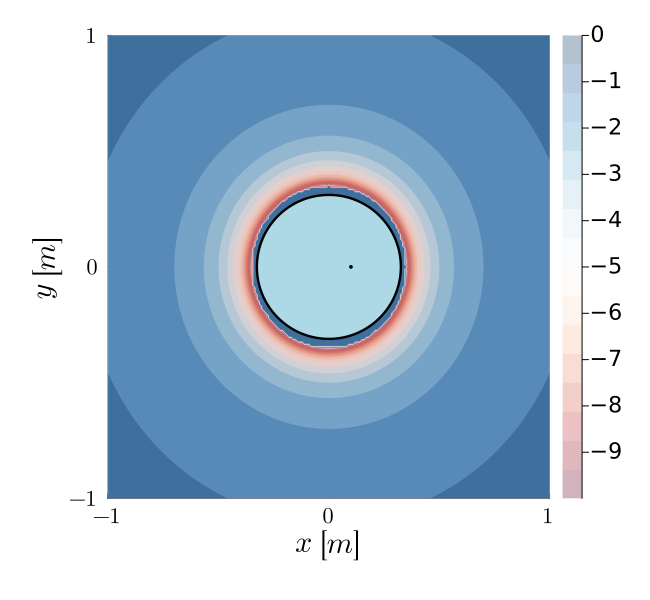

In [105]:
using Plots
using LaTeXStrings

Plots.scalefontsizes()
Plots.scalefontsizes(2)

plot(layout=(1,1), legend=:outerright, legendfontsize = 15, grid = false,
        xtickfontsize=15, ytickfontsize=15, xguidefontsize=20, yguidefontsize=20)

contour!(space, space, -1*Potential, fill = true, color =:RdBu, label=false,
        linewidth = 0, alpha =0.3, legend =true, )

#plot intruder
scatter!((0.0, 0.0), label =:false,  markersize=80, msw=2, alpha = 1.0, color =:lightblue)
#scatter!((0.0, l(a, b)), label =:false,  markersize=5, msw=0, alpha = 1.0, color =:black)


b_vel = -1 .* Δv(a, b)#b.vel .* b.heading
quiver!([0.1], [0.0], quiver = 0.25.*([b_vel[1]], [b_vel[2]]), color =:black, linewidth=3.8, thickness_scaling = 1)


#quiver!([1.0, 1.0], quiver = 0.5 .*([b_vel[1]], [b_vel[2]]), color =:black, linewidth=5, thickness_scaling = 1)


a_vel = a.vel .* a.heading
#quiver!([-1.0, -1.0], quiver = 0.5 .*([a_vel[1]], [a_vel[2]]), color =:black, linewidth=5, thickness_scaling = 1)


plot!(xlabel=L"$x$ $[m]$")
plot!(ylabel=L"$y$ $[m]$")

x_min, x_max = -1, 1
y_min, y_max = -1, 1

x_ticks = collect(x_min:1:x_max)
y_ticks = collect(y_min:1:y_max)

plot!(yticks=(x_ticks, Create_LaTeXString(x_ticks)))
plot!(xticks=(y_ticks, Create_LaTeXString(y_ticks)))

plot!(xlims = [x_min, x_max])
plot!(ylims = [y_min, y_max])

plot!(size=(650,600), margin = 0.7Plots.cm)
#savefig("/home/jakob/Dokumente/CentrifugalForce_ABS_FORCE.png")

In [106]:
dx = 0.4
space = collect(-2.0+dx:dx:2.0-dx)

Grid_x = fill(0.0, length(space)*length(space))
Grid_y = copy(Grid_x)
v_x = copy(Grid_x)
v_y = copy(Grid_x)

k = 1

for (i, x) in enumerate(space)
       
    for (j, y) in enumerate(space)       
        
        a.pos = (x, y)
        
        if d(a, b) >= l(a, b)+0.05
        
            #gradient = -1 .* ∇r_ϕ(a, menge, geometrie, system_size)
            #Random.srand()
            #e_opt, v_opt = Calc_Heading_Velocity(a, menge, geometrie, system_size)
            #gradient = e_opt .* v_opt
            #F_ = F(a, menge, geometrie, system_size)
            #gradient = abs(F_) > 0.01 ? normalize(F(a, menge, geometrie, system_size)) : (0.0, 0.0)
            gradient = F(a, menge, geometrie, system_size)

        
            v_x[k] = gradient[1]
            v_y[k] = gradient[2]
            
        end
        
        Grid_x[k] = x
        Grid_y[k] = y
        
        k += 1
            
    end
end

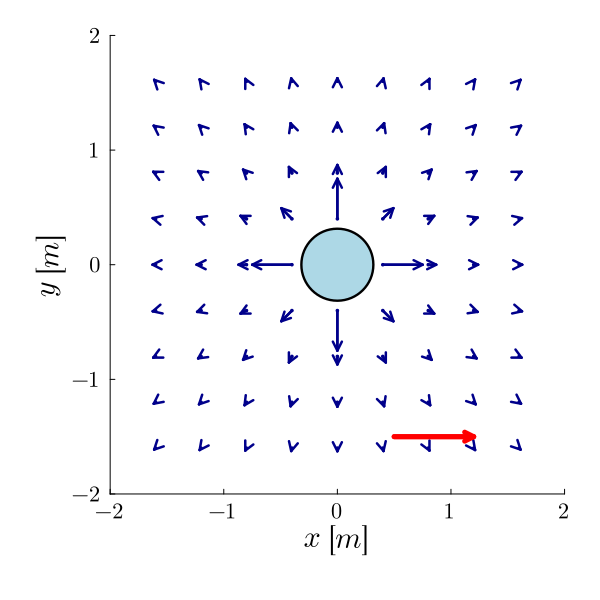

In [109]:
using Plots
using LaTeXStrings, ColorSchemes

Plots.scalefontsizes()
Plots.scalefontsizes(2)

plot(layout=(1,1), legend=:topleft, legendfontsize = 15, grid = false,
    xtickfontsize=15, ytickfontsize=15, xguidefontsize=20, yguidefontsize=20)

ϵ = 0.01
v_x, v_y = Round_Velocities(v_x, v_y, ϵ)

scale = 0.07

#plot velocity grid
scatter!(Grid_x, Grid_y, label =:false,  markersize=2, msw=0, color=:darkblue)
quiver!(Grid_x, Grid_y, quiver = scale .*(v_x, v_y), color =:darkblue, linewidth=2.5)


#plot intruder
scatter!((0.0, 0.0), label =:false,  markersize=40, msw=2, alpha = 1.0, color =:lightblue)
#scatter!((0.0, l(a, b)), label =:false,  markersize=5, msw=0, alpha = 1.0, color =:black)

b_vel = -1 .*Δv(a, b)# b.vel .* b.heading
#quiver!([0.2], [0.0], quiver = 0.4.*([b_vel[1]], [b_vel[2]]), color =:black, linewidth=3.8, thickness_scaling = 1)


#reference velocity
quiver!([0.5], [-1.5], quiver = (scale*[10.0], [0.0]), color =:red, linewidth=5, thickness_scaling = 1)

plot!(xlabel=L"$x$ $[m]$")
plot!(ylabel=L"$y$ $[m]$")

x_min, x_max = -2, 2
y_min, y_max = -2, 2

x_ticks = collect(x_min:1:x_max)
y_ticks = collect(y_min:1:y_max)

plot!(yticks=(x_ticks, Create_LaTeXString(x_ticks)))
plot!(xticks=(y_ticks, Create_LaTeXString(y_ticks)))

plot!(xlims = [x_min, x_max])
plot!(ylims = [y_min, y_max])

plot!(size=(600,600), margin = 0.7Plots.cm)
#savefig("/home/jakob/Dokumente/Centrifugal_Force_Direction_SCALEX10.png")